# Intro

The current SpaceNet corpus includes thousands of square kilometers of high resolution imagery collected from DigitalGlobe’s commercial satellites which includes 8-band multispectral data. This dataset is being made public to advance the development of algorithms to automatically extract geometric features such as roads, building footprints, and points of interest using satellite imagery.
The currently available Areas of Interest (AOI) are:
    - Rio de Janeiro
    - Paris
    - Las Vegas
    - Shanghai
    - Khartoum

The satellite imagery, along with training data, is provided via a collaboration between DigitalGlobe, CosmiQ Works, and NVIDIA.

This notebook explores the geojson file from Spacenet's 1 AOI 1 – Rio – Building Extraction Training challenge

This dataset has 6,940 processed 200mx200m tiles of AOI 1 (23 GB) with associated building footprints for training 

In [1]:
import os
import json
import geopandas as gpd
import numpy as np
import pandas as pd
from pandas import DataFrame
import glob
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline

### You can find the dataset at the URL:  https://spacenet.ai/spacenet-buildings-dataset-v1/
        
### If you want to download the data you will need an AWS account, the aws cli.  No charge to get the data

In [2]:
images_folder = "data/processedBuildingLabels/3band/"
labels_folder = "data/processedBuildingLabels/vectordata/geojson/"
lf = "data/processedBuildingLabels/vectordata/geojson/*.geojson"

### you can associate the geojon file with the .tff files by the number img<number>

In [3]:
# print([name for name in os.listdir(labels_folder)])

In [4]:
# make it easy to see json
geo1 = "data/processedBuildingLabels/vectordata/geojson/Geo_AOI_1_RIO_img5394.geojson"

with open(geo1, 'r') as j:
     geo2 = json.loads(j.read())
#print(contents)
#print(json.dumps(geo2, indent=4, sort_keys=True))

In [5]:
# preference to use pandas dataframes

df_2 = pd.DataFrame() 
with open(geo1, 'r') as j:
    df_geo2 = gpd.read_file(geo1)
    df_2 = df_2.append(df_geo2)
    df_2['fname'] = geo1
df_2.shape

(70, 20)

In [6]:
df_2.head()

,timestamp,version,changeset,user,uid,HGIS_OID,building,type,id,area,QAStatus,HGISOID,TaskArea,Revision1,Shape_Leng,Shape_Area,partialBuilding,partialDec,geometry,fname
0,2016-06-24T20:32:10+00:00,1,5824,Derick,43,119074.0,yes,None,way/170206,yes,Modified_Original_Rev1,119074.0,West,Yes,0.000629,0.0,1.0,0.906931,"POLYGON Z ((-43.55156 -22.86918 0.00000, -43.5...",data/processedBuildingLabels/vectordata/geojso...
1,2016-06-24T20:41:14+00:00,1,5824,Derick,43,119072.0,yes,None,way/175342,yes,Modified_Original_Rev1,119072.0,West,Yes,0.000270,0.0,0.0,1.000000,"POLYGON Z ((-43.55158 -22.86964 0.00000, -43.5...",data/processedBuildingLabels/vectordata/geojso...
2,2016-06-24T20:48:44+00:00,1,5837,Derick,43,119073.0,yes,None,way/181096,yes,Modified_Original_Rev1,119073.0,West,Yes,0.000343,0.0,0.0,1.000000,"POLYGON Z ((-43.55161 -22.86941 0.00000, -43.5...",data/processedBuildingLabels/vectordata/geojso...
3,2016-06-24T20:48:56+00:00,1,5837,Derick,43,118957.0,yes,None,way/181261,yes,Original_Building,118957.0,West,No,0.000329,0.0,1.0,0.040668,"POLYGON Z ((-43.55306 -22.87088 0.00000, -43.5...",data/processedBuildingLabels/vectordata/geojso...
4,2016-06-24T20:52:35+00:00,1,5837,Derick,43,119003.0,yes,None,way/184265,yes,Original_Building,119003.0,West,No,0.000411,0.0,1.0,0.957360,"POLYGON Z ((-43.55220 -22.87088 0.00000, -43.5...",data/processedBuildingLabels/vectordata/geojso...


In [7]:
df_3 = pd.DataFrame() 
df_3 = df_2.copy()
df_3['building_cnt'] = [1 if x =='yes' else 0 for x in df_2['building']]

In [8]:
df_3.head()

,timestamp,version,changeset,user,uid,HGIS_OID,building,type,id,area,...,HGISOID,TaskArea,Revision1,Shape_Leng,Shape_Area,partialBuilding,partialDec,geometry,fname,building_cnt
0,2016-06-24T20:32:10+00:00,1,5824,Derick,43,119074.0,yes,None,way/170206,yes,...,119074.0,West,Yes,0.000629,0.0,1.0,0.906931,"POLYGON Z ((-43.55156 -22.86918 0.00000, -43.5...",data/processedBuildingLabels/vectordata/geojso...,1
1,2016-06-24T20:41:14+00:00,1,5824,Derick,43,119072.0,yes,None,way/175342,yes,...,119072.0,West,Yes,0.000270,0.0,0.0,1.000000,"POLYGON Z ((-43.55158 -22.86964 0.00000, -43.5...",data/processedBuildingLabels/vectordata/geojso...,1
2,2016-06-24T20:48:44+00:00,1,5837,Derick,43,119073.0,yes,None,way/181096,yes,...,119073.0,West,Yes,0.000343,0.0,0.0,1.000000,"POLYGON Z ((-43.55161 -22.86941 0.00000, -43.5...",data/processedBuildingLabels/vectordata/geojso...,1
3,2016-06-24T20:48:56+00:00,1,5837,Derick,43,118957.0,yes,None,way/181261,yes,...,118957.0,West,No,0.000329,0.0,1.0,0.040668,"POLYGON Z ((-43.55306 -22.87088 0.00000, -43.5...",data/processedBuildingLabels/vectordata/geojso...,1
4,2016-06-24T20:52:35+00:00,1,5837,Derick,43,119003.0,yes,None,way/184265,yes,...,119003.0,West,No,0.000411,0.0,1.0,0.957360,"POLYGON Z ((-43.55220 -22.87088 0.00000, -43.5...",data/processedBuildingLabels/vectordata/geojso...,1


In [9]:
dist_temp = df_3.groupby('fname', as_index=False).agg({"building_cnt": "sum"})

In [10]:
dist_temp

,fname,building_cnt
0,data/processedBuildingLabels/vectordata/geojso...,70


In [11]:
df_a = gpd.read_file(geo1)

In [12]:
df_a['fname'] = geo1
df_a.head()

,timestamp,version,changeset,user,uid,HGIS_OID,building,type,id,area,QAStatus,HGISOID,TaskArea,Revision1,Shape_Leng,Shape_Area,partialBuilding,partialDec,geometry,fname
0,2016-06-24T20:32:10+00:00,1,5824,Derick,43,119074.0,yes,None,way/170206,yes,Modified_Original_Rev1,119074.0,West,Yes,0.000629,0.0,1.0,0.906931,"POLYGON Z ((-43.55156 -22.86918 0.00000, -43.5...",data/processedBuildingLabels/vectordata/geojso...
1,2016-06-24T20:41:14+00:00,1,5824,Derick,43,119072.0,yes,None,way/175342,yes,Modified_Original_Rev1,119072.0,West,Yes,0.000270,0.0,0.0,1.000000,"POLYGON Z ((-43.55158 -22.86964 0.00000, -43.5...",data/processedBuildingLabels/vectordata/geojso...
2,2016-06-24T20:48:44+00:00,1,5837,Derick,43,119073.0,yes,None,way/181096,yes,Modified_Original_Rev1,119073.0,West,Yes,0.000343,0.0,0.0,1.000000,"POLYGON Z ((-43.55161 -22.86941 0.00000, -43.5...",data/processedBuildingLabels/vectordata/geojso...
3,2016-06-24T20:48:56+00:00,1,5837,Derick,43,118957.0,yes,None,way/181261,yes,Original_Building,118957.0,West,No,0.000329,0.0,1.0,0.040668,"POLYGON Z ((-43.55306 -22.87088 0.00000, -43.5...",data/processedBuildingLabels/vectordata/geojso...
4,2016-06-24T20:52:35+00:00,1,5837,Derick,43,119003.0,yes,None,way/184265,yes,Original_Building,119003.0,West,No,0.000411,0.0,1.0,0.957360,"POLYGON Z ((-43.55220 -22.87088 0.00000, -43.5...",data/processedBuildingLabels/vectordata/geojso...


In [13]:
df_a['building_cnt'] = [1 if x =='yes' else 0 for x in df_a['building']] 

In [14]:
df_a['building_cnt'].count()

70

In [15]:
file_list = glob.glob(lf)
#file_list

In [16]:
# not efficient, get a cup of your favorite beverage, it has to get to 6,940
df = pd.DataFrame() 
df_tmp = pd.DataFrame()
cnt = 0
pathlist = Path(labels_folder).rglob('*.geojson') 

for path in pathlist:
    path1 = str(path)
    with open(geo1, 'r') as j:
        df_tmp = gpd.read_file(path1)
        df_tmp['fname'] = path1
        df = df.append(df_tmp)
        cnt += 1
      #  print(cnt)
# this takes a while to run
print('done')

done


In [17]:
dfa = pd.DataFrame() 
dfa = df.copy()
dfa['building_cnt'] = [1 if x =='yes' else 0 for x in df['building']]

understanding the data
I did some spot checks on the geojson coordinates. Could use additional QA

In [18]:
dist = dfa.groupby('fname', as_index=False).agg({"building_cnt": "sum"})

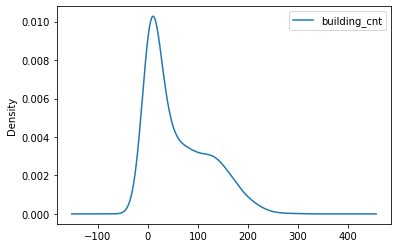

In [19]:
ax = dist.plot.kde(bw_method=0.3)

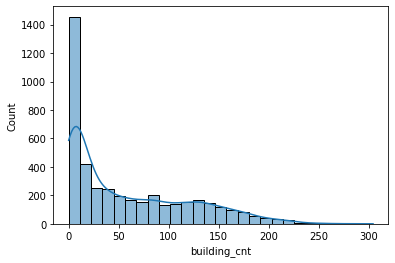

In [20]:
# the majority of the .tif files have very few building
# 2,638 of the 6,490 .tif files have no buildings
# the data set as shown in the plot below does not have a normal ditribution of buildings
# Some of the geojson is not accruate
# fun challenge for any data scientist to build a good classifier
sns.histplot(dist.building_cnt, kde=True)
plt.show()

In [21]:
 np.percentile(dist.building_cnt, 25),np.percentile(dist.building_cnt, 50),np.percentile(dist.building_cnt, 75)  

(7.0, 34.0, 102.0)

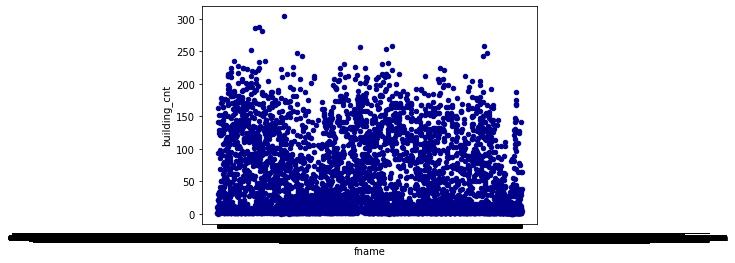

In [22]:
ax1 = dist.plot.scatter(x='fname',y='building_cnt',c='DarkBlue')